In [221]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
from IPython.display import display
import seaborn as sns

# EXPLORE THE DATA

In [222]:
# Read the data
results = pd.read_csv("gcse-results-ethnicity.csv")
results.head()

,Code,Area,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2018/19,All,White,903,41.7,-0.21
1,E09000002,Barking and Dagenham,2018/19,All,Mixed,227,44.7,0.05
2,E09000002,Barking and Dagenham,2018/19,All,Asian,530,53.3,0.6
3,E09000002,Barking and Dagenham,2018/19,All,Black,642,48,0.37
4,E09000002,Barking and Dagenham,2018/19,All,Chinese,3,69,0.93


In [225]:
results.tail()

,Code,Area,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
3235,E12000003,Yorkshire and the Humber,2015/16,Girls,Asian,"2,938",50.5,0.28
3236,E12000003,Yorkshire and the Humber,2015/16,Girls,Black,530,50.4,0.42
3237,E12000003,Yorkshire and the Humber,2015/16,Girls,Chinese,64,64,0.96
3238,E12000003,Yorkshire and the Humber,2015/16,Girls,Mixed,809,50.5,0.08
3239,E12000003,Yorkshire and the Humber,2015/16,Girls,White,"22,024",51.4,0.08


In [226]:
#Information on the dataframe.
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         3240 non-null   object
 1   Area         3240 non-null   object
 2   Year         3240 non-null   object
 3   Sex          3240 non-null   object
 4   Ethnicity    3240 non-null   object
 5   Pupils       3240 non-null   object
 6   Attainment8  3240 non-null   object
 7   Progress8    3240 non-null   object
dtypes: object(8)
memory usage: 202.6+ KB


In [227]:
# Generating Descriptive statistics on the dataframe.
results.describe()

,Code,Area,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
count,3240,3240,3240,3240,3240,3240,3240,3240
unique,45,45,4,4,9,1681,390,236
top,E09000020,Southwark,2017/18,All,Chinese,x,.,.
freq,72,72,810,1080,540,51,79,81


# MISSING VALUES 


In [228]:
results.isnull().sum()

Code           0
Area           0
Year           0
Sex            0
Ethnicity      0
Pupils         0
Attainment8    0
Progress8      0
dtype: int64

In [229]:
# To check for missing values by column 
print('There are {} null values in the gcse results dataset.'.format(results.isnull().sum().sum()))

There are 0 null values in the gcse results dataset.


# DROP COLUMNS 

In [230]:
results.drop(columns = ['Code'], inplace=True)
results.head()

,Area,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
0,Barking and Dagenham,2018/19,All,White,903,41.7,-0.21
1,Barking and Dagenham,2018/19,All,Mixed,227,44.7,0.05
2,Barking and Dagenham,2018/19,All,Asian,530,53.3,0.6
3,Barking and Dagenham,2018/19,All,Black,642,48,0.37
4,Barking and Dagenham,2018/19,All,Chinese,3,69,0.93


# DATA VISUALISATION

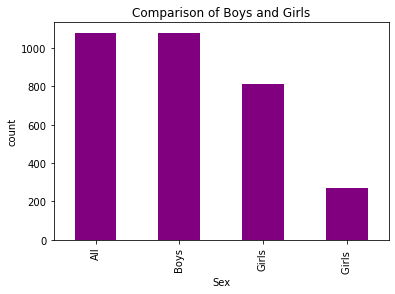

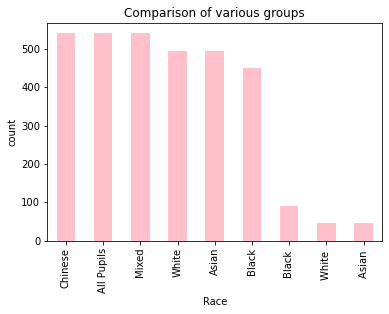

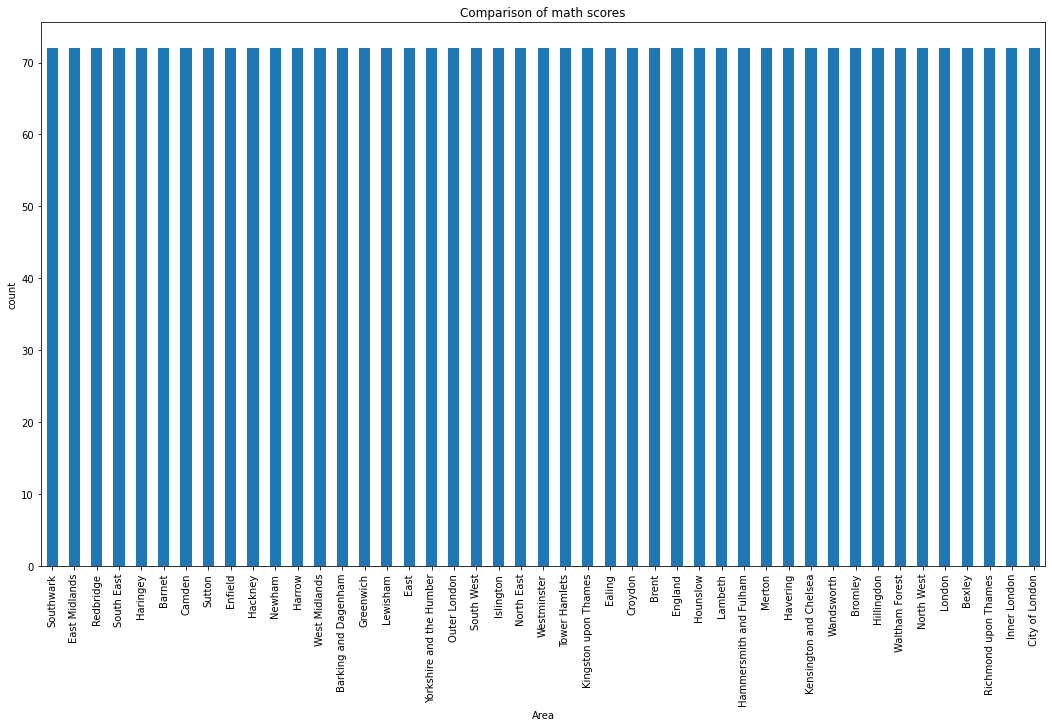

In [231]:
# visualizing the number of boys and girls in the dataset
results['Sex'].value_counts(normalize = True)
results['Sex'].value_counts(dropna = False).plot.bar(color = 'purple')
plt.title('Comparison of Boys and Girls')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

# visualizing the different race in the dataset
results['Ethnicity'].value_counts(normalize = True)
results['Ethnicity'].value_counts(dropna = False).plot.bar(color = 'pink')
plt.title('Comparison of various groups')
plt.xlabel('Race')
plt.ylabel('count')
plt.show()

# visualizing the number/types of area in the dataset
results['Area'].value_counts(normalize = True)
results['Area'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('Area')
plt.ylabel('count')
plt.show()

In [232]:
results['Sex'].value_counts()

All       1080
Boys      1080
Girls      810
Girls      270
Name: Sex, dtype: int64

In [233]:
results['Ethnicity'].value_counts()

Chinese       540
All Pupils    540
Mixed         540
White         495
Asian         495
Black         450
Black          90
White          45
Asian          45
Name: Ethnicity, dtype: int64

In [234]:
results['Area'].value_counts().head()

Southwark        72
East Midlands    72
Redbridge        72
South East       72
Haringey         72
Name: Area, dtype: int64

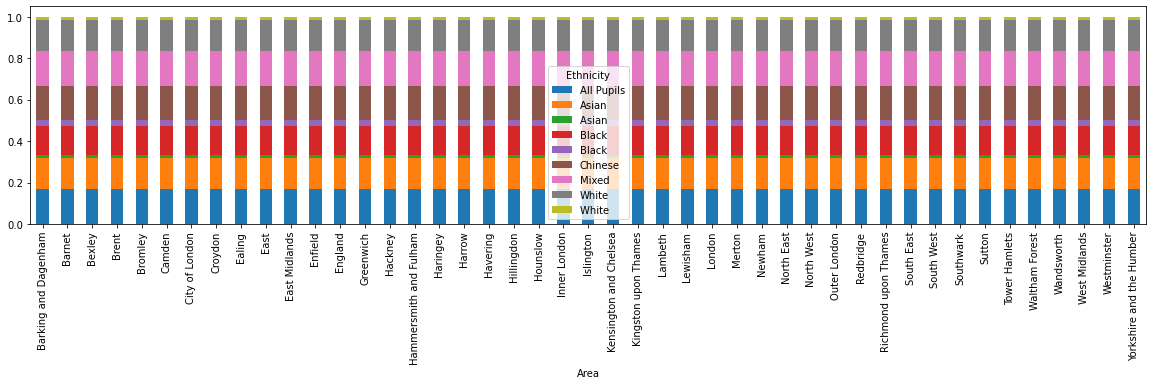

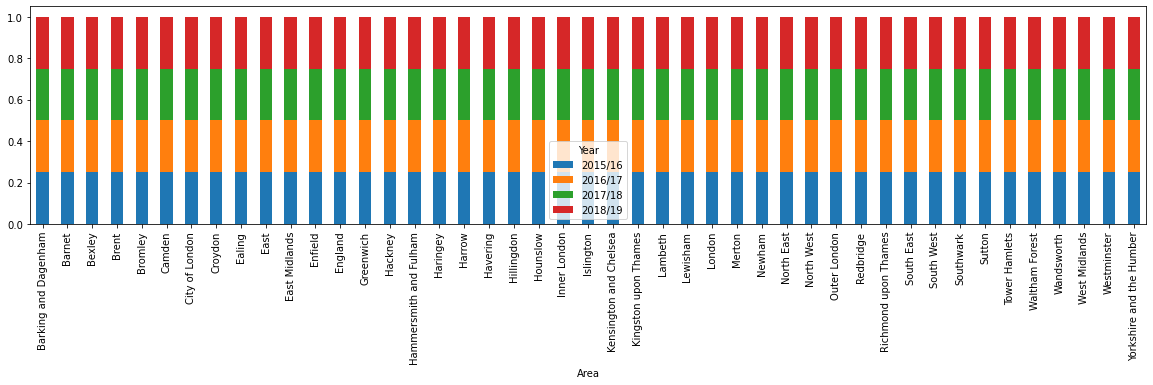

In [235]:
x = pd.crosstab(results['Area'], results['Ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (20, 4) )

y = pd.crosstab(results['Area'], results['Year'])
y.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (20, 4) )